In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
data = pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df = data.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [76]:
df.shape

(200, 4)

In [77]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## TV-Sales

In [78]:
# bağımsız değişkenimizin seçimi
X = df[["TV"]]
# bağımlı değişkenimizin seçimi
y = df["sales"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [80]:
lin_reg = LinearRegression()

In [81]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
lin_reg.intercept_

7.1196384305929525

In [83]:
lin_reg.coef_

array([0.04652973])

In [85]:
# denklem
print("Sales= " + str("%.2f" % lin_reg.intercept_) + "+TV*" + str("%.2f" % lin_reg.coef_[0]) )

Sales= 7.12+TV*0.05


In [86]:
y_pred = lin_reg.predict(X_test)

In [89]:
#rmse değeri
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse

3.194472431998898

In [90]:
np.std(y_test)

5.618148605190147

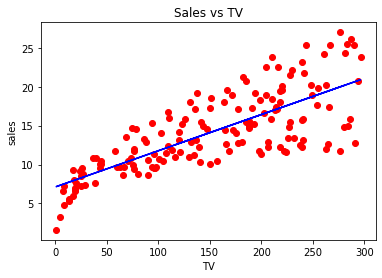

In [92]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Sales vs TV')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

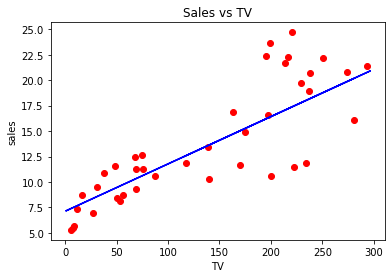

In [93]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Sales vs TV')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()